### Загружаем используемые нами библиотеки, и наш data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
taxi_data_frame = pd.read_csv("/home/alex/introduction_project/trip_data_6_9_15.csv", sep = ',', low_memory = False)
taxi_data_frame = taxi_data_frame[taxi_data_frame['passenger_count'] > 0]
passenger_count = taxi_data_frame.as_matrix(columns = ["passenger_count"])


### Исследуем распределение количества поездок с различным числом пассажиров внутри

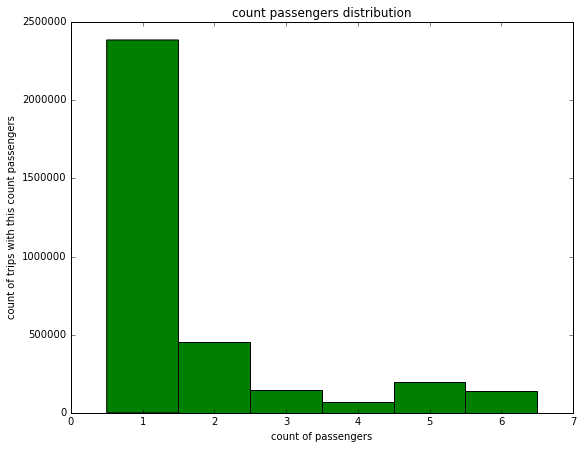

In [3]:
plt.figure(figsize = (9, 7), dpi = 80)
plt.hist(passenger_count, bins= [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], color='green')
plt.title("count passengers distribution")
plt.xlabel("count of passengers")
plt.ylabel("count of trips with this count passengers")
plt.show()

### Исследуем зависимость количества пассажиров в такси от времени их поездки

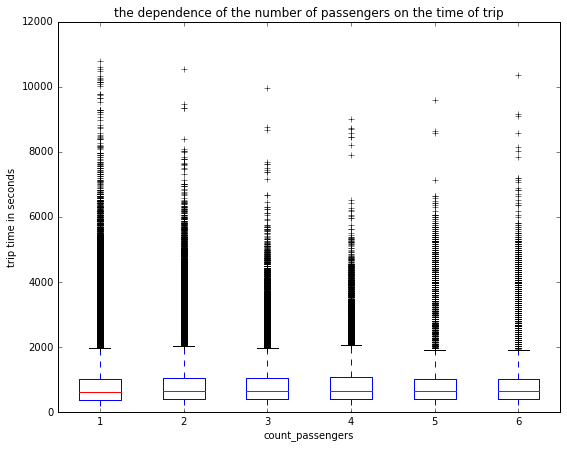

In [4]:
time_1 = taxi_data_frame[taxi_data_frame['passenger_count'] == 1]
time_1 = time_1.as_matrix(columns = ['trip_time_in_secs'])

time_2 = taxi_data_frame[taxi_data_frame['passenger_count'] == 2]
time_2 = time_2.as_matrix(columns = ['trip_time_in_secs'])

time_3 = taxi_data_frame[taxi_data_frame['passenger_count'] == 3]
time_3 = time_3.as_matrix(columns = ['trip_time_in_secs'])

time_4 = taxi_data_frame[taxi_data_frame['passenger_count'] == 4]
time_4 = time_4.as_matrix(columns = ['trip_time_in_secs'])

time_5 = taxi_data_frame[taxi_data_frame['passenger_count'] == 5]
time_5 = time_5.as_matrix(columns = ['trip_time_in_secs'])

time_6 = taxi_data_frame[taxi_data_frame['passenger_count'] == 6]
time_6 = time_6.as_matrix(columns = ['trip_time_in_secs'])



all_time = [time_1, time_2, time_3, time_4, time_5, time_6]
plt.figure(figsize = (9, 7), dpi = 80)
#plt.scatter(time, passenger_count, color = 'red', s = 1.5)
#plt.ylim(-1, 7)
bp = plt.boxplot(all_time)

plt.ylabel('trip time in seconds')
plt.xlabel('count_passengers')
plt.title('the dependence of the number of passengers on the time of trip')
plt.show()

### Исследуем зависимость длинны поездки от количества пассажиров находящихся в такси

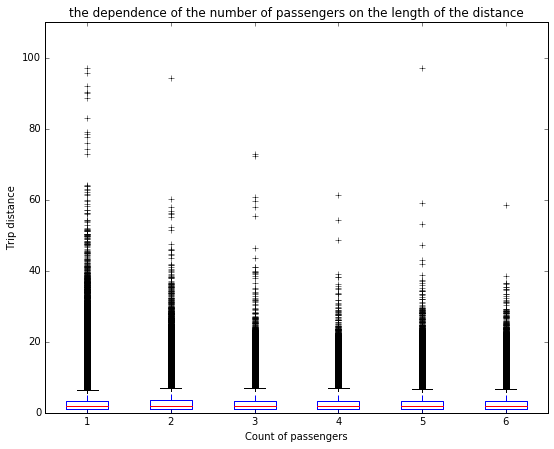

In [5]:
trip_dist_1 = taxi_data_frame[taxi_data_frame['passenger_count'] == 1]
trip_dist_1 = trip_dist_1.as_matrix(columns = ['trip_distance'])

trip_dist_2 = taxi_data_frame[taxi_data_frame['passenger_count'] == 2]
trip_dist_2 = trip_dist_2.as_matrix(columns = ['trip_distance'])

trip_dist_3 = taxi_data_frame[taxi_data_frame['passenger_count'] == 3]
trip_dist_3 = trip_dist_3.as_matrix(columns = ['trip_distance'])

trip_dist_4 = taxi_data_frame[taxi_data_frame['passenger_count'] == 4]
trip_dist_4 = trip_dist_4.as_matrix(columns = ['trip_distance'])

trip_dist_5 = taxi_data_frame[taxi_data_frame['passenger_count'] == 5]
trip_dist_5 = trip_dist_5.as_matrix(columns = ['trip_distance'])

trip_dist_6 = taxi_data_frame[taxi_data_frame['passenger_count'] == 6]
trip_dist_6 = trip_dist_6.as_matrix(columns = ['trip_distance'])

all_trips = [trip_dist_1, trip_dist_2, trip_dist_3, trip_dist_4, trip_dist_5, trip_dist_6]

plt.figure(figsize = (9, 7), dpi = 80)
plt.boxplot(all_trips)
plt.ylim(0, 110)
plt.xlabel("Count of passengers")
plt.ylabel("Trip distance")
plt.title("the dependence of the number of passengers on the length of the distance")
plt.show()

### Исследуем суммарное распределение налогов/доходов за месяц

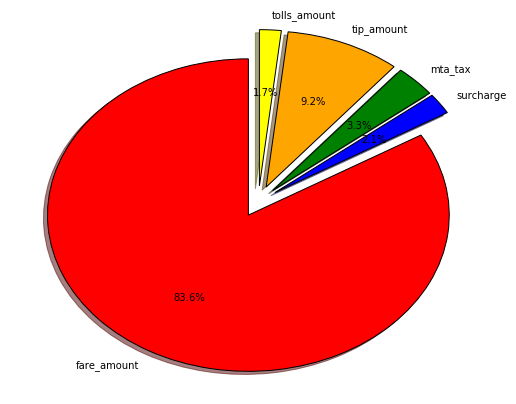

In [6]:
score = pd.read_csv("/home/alex/introduction_project/trip_fare_6_9_15.csv", sep = ',', low_memory = False)
only_rate = pd.DataFrame(score, columns=['fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount'])
rate_for_each_type = only_rate.sum(axis=0)
l1 = []
for key in rate_for_each_type.keys():
    l1.append(rate_for_each_type[key])
labels = ['fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
colors = ['red', 'blue', 'green', 'orange', 'yellow']
plt.figure(figsize = (9, 7), dpi = 80)
h = plt.pie(l1,  labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colors)
plt.show()

### Исследуем зависимость отношения налогов к общей стоимости поездки и отношение доходов к общей стоимости поездки для каждой поездки

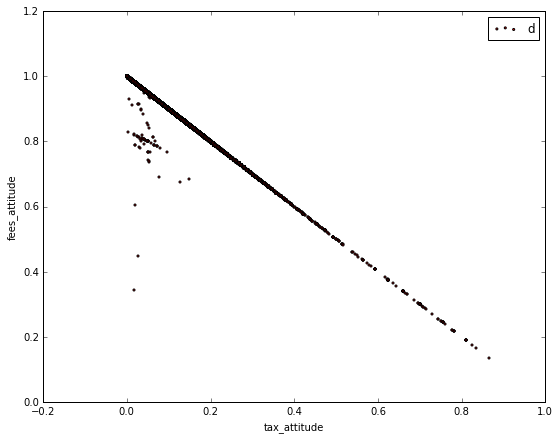

In [7]:
only_rate = pd.DataFrame(score, columns=['fare_amount', 
                                         'surcharge',
                                         'mta_tax', 'tip_amount', 
                                         'tolls_amount', 'total_amount'])
fare_amount = only_rate.as_matrix(columns = ['fare_amount'])
surcharge = only_rate.as_matrix(columns = ['surcharge'])
mta_tax = only_rate.as_matrix(columns=['mta_tax'])
tip_amount = only_rate.as_matrix(columns=['tip_amount'])
tolls_amount = only_rate.as_matrix(columns=['tolls_amount'])
total_amount = only_rate.as_matrix(columns =['total_amount'])


tax_attitude = (mta_tax + tolls_amount) / total_amount
fees_attitude = (fare_amount + surcharge + tip_amount) / total_amount

plt.figure(figsize = (9, 7), dpi = 80)
plt.scatter(tax_attitude, fees_attitude, s = 4.1, c='red')
plt.ylabel("fees_attitude")
plt.xlabel('tax_attitude')
plt.legend('dependece fees attitude of tax attitude')
plt.show()
